## 2Ï∞® Í≥ºÏ†ú

- Ï£ºÏ†ú: Îç∞Ïù¥ÌÑ∞ ÌÅ¨Î°§ÎßÅÏùÑ ÌôúÏö©Ìïú Îâ¥Ïä§ & Î¶¨Î∑∞ Îç∞Ïù¥ÌÑ∞ Î∂ÑÏÑù
- Îç∞Ïù¥ÌÑ∞: ÏûêÏú†Î°≠Í≤å ÌÅ¨Î°§ÎßÅ
- ÏÇ¨Ïö© ÎùºÏù¥Î∏åÎü¨Î¶¨: selenium, beautifulsoup, etc.

In [8]:
pip install selenium

Note: you may need to restart the kernel to use updated packages.


DEPRECATION: mecab-python 0.996-ko-0.9.2-msvc has a non-standard version number. pip 23.3 will enforce this behaviour change. A possible replacement is to upgrade to a newer version of mecab-python or contact the author to suggest that they release a version with a conforming version number. Discussion can be found at https://github.com/pypa/pip/issues/12063


In [9]:
pip install webdriver_manager


  Obtaining dependency information for webdriver_manager from https://files.pythonhosted.org/packages/b1/51/b5c11cf739ac4eecde611794a0ec9df420d0239d51e73bc19eb44f02b48b/webdriver_manager-4.0.1-py2.py3-none-any.whl.metadata
  Obtaining dependency information for python-dotenv from https://files.pythonhosted.org/packages/6a/3e/b68c118422ec867fa7ab88444e1274aa40681c606d59ac27de5a5588f082/python_dotenv-1.0.1-py3-none-any.whl.metadata


DEPRECATION: mecab-python 0.996-ko-0.9.2-msvc has a non-standard version number. pip 23.3 will enforce this behaviour change. A possible replacement is to upgrade to a newer version of mecab-python or contact the author to suggest that they release a version with a conforming version number. Discussion can be found at https://github.com/pypa/pip/issues/12063


In [1]:
from bs4 import BeautifulSoup
import requests
import re
import time
from selenium import webdriver
from selenium.webdriver.common.by import By
from webdriver_manager.chrome import ChromeDriverManager
import nltk
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.probability import FreqDist
import re
import pandas as pd

In [2]:
options = webdriver.ChromeOptions()
options.add_experimental_option("excludeSwitches", ["enable-automation"])
options.add_experimental_option("useAutomationExtension", False)

### 1. Îâ¥Ïä§ Í∏∞ÏÇ¨ Îç∞Ïù¥ÌÑ∞ ÌÅ¨Î°§ÎßÅ

1.1 ÏõêÌïòÎäî Îâ¥Ïä§ Í∏∞ÏÇ¨Ïùò Î≥∏Î¨∏ÏùÑ ÌÅ¨Î°§ÎßÅÌïòÏãúÏò§.

In [3]:
url = 'https://www.hufs.ac.kr/hufs/11403/subview.do?enc=Zm5jdDF8QEB8JTJGYmJzJTJGaHVmcyUyRjIxODclMkYxNTMxNjclMkZhcnRjbFZpZXcuZG8lM0ZwYWdlJTNEMSUyNnNyY2hDb2x1bW4lM0QlMjZzcmNoV3JkJTNEJTI2YmJzQ2xTZXElM0QlMjZiYnNPcGVuV3JkU2VxJTNEJTI2cmdzQmduZGVTdHIlM0QlMjZyZ3NFbmRkZVN0ciUzRCUyNmlzVmlld01pbmUlM0RmYWxzZSUyNnBhc3N3b3JkJTNEJTI2'
response = requests.get(url)
     

soup = BeautifulSoup(response.text, 'html.parser')

tags = soup.find_all('p')

txt_list = [txt.get_text() for txt in tags]
news = ' '.join(txt_list)
print(news)
     

Ïö∞Î¶¨ÎåÄÌïô ÎåÄÌïôÏùºÏûêÎ¶¨ÌîåÎü¨Ïä§Î≥∏Î∂Ä(Î≥∏Î∂ÄÏû• Ïù¥ÏßÄÏó∞)Îäî ÏßÄÎÇú 3Ïõî 11Ïùº(Ïõî), Ï†ú3Í∏∞ ÏßÑÎ°úÏ∑®ÏóÖÏßÄÏõêÏÑºÌÑ∞ ÏÑúÌè¨ÌÑ∞Ï¶à ÏàòÎ£åÏãùÏùÑ Í∞úÏµúÌïòÏòÄÎã§.    ‚ÄòÏßÑÎ°úÏ∑®ÏóÖÏßÄÏõêÏÑºÌÑ∞ ÏÑúÌè¨ÌÑ∞Ï¶à‚ÄôÎäî ÎåÄÌïôÏùºÏûêÎ¶¨ÌîåÎü¨Ïä§Î≥∏Î∂Ä ÏßÑÎ°úÏ∑®ÏóÖÏßÄÏõêÏÑºÌÑ∞Ïùò Îã§ÏñëÌïú ÏÇ¨ÏóÖÍ≥º ÌîÑÎ°úÍ∑∏Îû®ÏùÑ ÌôçÎ≥¥Ìï®ÏúºÎ°úÏç® ÏÑºÌÑ∞ Ïù∏ÏßÄÎèÑÎ•º Í∞úÏÑ†ÌïòÍ≥† ÌïôÏÉùÎì§Ïùò ÏßÑÎ°úÏ∑®ÏóÖ ÏßÄÏõê ÌîÑÎ°úÍ∑∏Îû® Ï∞∏Ïó¨ÎèÑÎ•º ÎÜíÏù¥Í∏∞ ÏúÑÌï¥ Î∞úÏ°±, ÏßÄÎÇú 2022ÎÖÑÎ∂ÄÌÑ∞ 3Í∏∞Ïß∏ Ïö¥ÏòÅ Ï§ëÏù¥Îã§.  3ÌåÄÏúºÎ°ú Íµ¨ÏÑ±Îêú Ïù¥Î≤à 3Í∏∞ ÏÑúÌè¨ÌÑ∞Ï¶àÎäî ÏßÄÎÇúÌï¥ 9Ïõî, ÏûÑÎ™ÖÏãùÍ≥º OTÎ•º ÏãúÏûëÏúºÎ°ú ÏïΩ 5Í∞úÏõîÍ∞Ñ ‚ÄòHUFS Í∏ÄÎ°úÎ≤å ÏßÅÎ¨¥ Î∞ïÎûåÌöå‚Äô, ‚ÄòHUFS ÌäπÍ∞ï‚Äô, Îã§Ïàò Í∏∞Í¥ÄÍ≥ºÏùò ÏóÖÎ¨¥ ÌòëÏïΩ Îì± Ïò§ÌîÑÎùºÏù∏ ÌñâÏÇ¨Î•º ÏßÄÏõêÌïòÎäî Í≤ÉÏùÄ Î¨ºÎ°† Ïπ¥Îìú Îâ¥Ïä§ Ï†úÏûëÍ≥º Î∏îÎ°úÍ∑∏ Ïö¥ÏòÅÏùÑ ÌÜµÌï¥ ÏßÑÎ°úÏ∑®ÏóÖÏßÄÏõêÏÑºÌÑ∞Ïùò ÌîÑÎ°úÍ∑∏Îû®ÏùÑ Ìö®Í≥ºÏ†ÅÏúºÎ°ú ÌôçÎ≥¥ÌïòÍ≥† ÏßÄÏõêÌïòÎäî Îì± ÏÑúÌè¨ÌÑ∞Ï¶àÏùò Ïó≠Ìï†ÏùÑ Ï∂©Ïã§Ìûà ÎßàÏ≥§Îã§. ÌäπÌûà, Ïù∏Ïä§ÌÉÄÍ∑∏Îû® Î¶¥Ïä§ Î∞è ÏòÅÏÉÅÏùÑ Ï†úÏûëÌïòÏó¨

1.2 ÌÅ¨Î°§ÎßÅÌïú Î≥∏Î¨∏ÏùÑ Îã®Ïñ¥ Îã®ÏúÑÎ°ú ÎÇòÎàÑÍ≥† Í∞Å Îã®Ïñ¥Í∞Ä ÎÇòÏò® ÌöüÏàòÏôÄ Ìï®Íªò dataframe ÌòïÏãùÏúºÎ°ú Î≥ÄÌôòÌïòÏãúÏò§.

In [4]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\eun01\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [5]:
news1 = re.sub(r'[^\w\s]', '', news)
news2 = re.sub(r'\d+', '', news1)


tokens = word_tokenize(news2)
freq_dist = FreqDist(tokens)

for word, freq in freq_dist.items():
  print(f'{word}: {freq}')

Ïö∞Î¶¨ÎåÄÌïô: 1
ÎåÄÌïôÏùºÏûêÎ¶¨ÌîåÎü¨Ïä§Î≥∏Î∂ÄÎ≥∏Î∂ÄÏû•: 1
Ïù¥ÏßÄÏó∞Îäî: 1
ÏßÄÎÇú: 2
Ïõî: 2
ÏùºÏõî: 1
Ï†úÍ∏∞: 2
ÏßÑÎ°úÏ∑®ÏóÖÏßÄÏõêÏÑºÌÑ∞: 3
ÏÑúÌè¨ÌÑ∞Ï¶à: 3
ÏàòÎ£åÏãùÏùÑ: 1
Í∞úÏµúÌïòÏòÄÎã§: 1
ÏÑúÌè¨ÌÑ∞Ï¶àÎäî: 2
ÎåÄÌïôÏùºÏûêÎ¶¨ÌîåÎü¨Ïä§Î≥∏Î∂Ä: 1
ÏßÑÎ°úÏ∑®ÏóÖÏßÄÏõêÏÑºÌÑ∞Ïùò: 2
Îã§ÏñëÌïú: 2
ÏÇ¨ÏóÖÍ≥º: 1
ÌîÑÎ°úÍ∑∏Îû®ÏùÑ: 2
ÌôçÎ≥¥Ìï®ÏúºÎ°úÏç®: 1
ÏÑºÌÑ∞: 1
Ïù∏ÏßÄÎèÑÎ•º: 1
Í∞úÏÑ†ÌïòÍ≥†: 1
ÌïôÏÉùÎì§Ïùò: 1
ÏßÑÎ°úÏ∑®ÏóÖ: 1
ÏßÄÏõê: 1
ÌîÑÎ°úÍ∑∏Îû®: 1
Ï∞∏Ïó¨ÎèÑÎ•º: 1
ÎÜíÏù¥Í∏∞: 1
ÏúÑÌï¥: 1
Î∞úÏ°±: 1
ÎÖÑÎ∂ÄÌÑ∞: 1
Í∏∞Ïß∏: 1
Ïö¥ÏòÅ: 1
Ï§ëÏù¥Îã§: 1
ÌåÄÏúºÎ°ú: 1
Íµ¨ÏÑ±Îêú: 1
Ïù¥Î≤à: 1
Í∏∞: 1
ÏßÄÎÇúÌï¥: 1
ÏûÑÎ™ÖÏãùÍ≥º: 1
OTÎ•º: 1
ÏãúÏûëÏúºÎ°ú: 1
ÏïΩ: 2
Í∞úÏõîÍ∞Ñ: 1
HUFS: 2
Í∏ÄÎ°úÎ≤å: 1
ÏßÅÎ¨¥: 1
Î∞ïÎûåÌöå: 1
ÌäπÍ∞ï: 1
Îã§Ïàò: 1
Í∏∞Í¥ÄÍ≥ºÏùò: 1
ÏóÖÎ¨¥: 1
ÌòëÏïΩ: 1
Îì±: 2
Ïò§ÌîÑÎùºÏù∏: 1
ÌñâÏÇ¨Î•º: 1
ÏßÄÏõêÌïòÎäî: 2
Í≤ÉÏùÄ: 1
Î¨ºÎ°†: 1
Ïπ¥Îìú: 1
Îâ¥Ïä§: 1
Ï†úÏûëÍ≥º: 1
Î∏îÎ°úÍ∑∏: 1
Ïö¥ÏòÅÏùÑ: 1
ÌÜµÌï¥: 1
Ìö®Í≥ºÏ†ÅÏúºÎ°ú: 1
ÌôçÎ≥¥ÌïòÍ≥†: 1
ÏÑúÌè¨ÌÑ∞Ï¶àÏùò: 2
Ïó≠Ìï†ÏùÑ: 1
Ï∂©Ïã§Ìûà: 1
ÎßàÏ≥§Îã§: 1
ÌäπÌûà: 1
Ïù

In [6]:
df = pd.DataFrame(freq_dist.items(), columns=['ÌÜ†ÌÅ∞', 'ÎπàÎèÑÏàò'])
print(df)

                ÌÜ†ÌÅ∞  ÎπàÎèÑÏàò
0             Ïö∞Î¶¨ÎåÄÌïô    1
1    ÎåÄÌïôÏùºÏûêÎ¶¨ÌîåÎü¨Ïä§Î≥∏Î∂ÄÎ≥∏Î∂ÄÏû•    1
2             Ïù¥ÏßÄÏó∞Îäî    1
3               ÏßÄÎÇú    2
4                Ïõî    2
..             ...  ...
157        Foreign    1
158        Studies    1
159            All    1
160         Rights    1
161       Reserved    1

[162 rows x 2 columns]


1.3 Î∂àÏö©Ïñ¥Î•º Ï†úÍ±∞ÌïòÏãúÏò§.

In [7]:
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\eun01\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [8]:
stop_words = "Îäî Ïùò Îã§ÏñëÌïú Í≥º ÏùÑ Ìï®ÏúºÎ°úÏç® ÌïòÍ≥† Ï§ëÏù¥Îã§ ÏúºÎ°ú Îêú ÏúºÎ°ú Í∞Ñ Îì± ÌÜµÌï¥ ÌïòÎäî ÎßàÏ≥§Îã§ ÌïòÍ∏∞ÎèÑ ÌïòÏòÄÎã§ ÏùÄ Î°úÏÑú ÎèÑÎ°ù Îã§Îäî Ïù¥ ÍπåÏßÄ Ïóê Í∏∏ Îã§ ÎùºÍ≥† Ìïú Îç∞ ÌïòÏó¨ Ïù¥ÎùºÎäî"
filtered_tokens = [token for token in tokens if token not in stop_words]

filtered_freq_dist = FreqDist(filtered_tokens)
df1 = pd.DataFrame(filtered_freq_dist.items(), columns=['ÌÜ†ÌÅ∞', 'ÎπàÎèÑÏàò'])
print(df1)

                ÌÜ†ÌÅ∞  ÎπàÎèÑÏàò
0             Ïö∞Î¶¨ÎåÄÌïô    1
1    ÎåÄÌïôÏùºÏûêÎ¶¨ÌîåÎü¨Ïä§Î≥∏Î∂ÄÎ≥∏Î∂ÄÏû•    1
2             Ïù¥ÏßÄÏó∞Îäî    1
3               ÏßÄÎÇú    2
4                Ïõî    2
..             ...  ...
150        Foreign    1
151        Studies    1
152            All    1
153         Rights    1
154       Reserved    1

[155 rows x 2 columns]


1.4 Ï≤òÎ¶¨Ìïú Îç∞Ïù¥ÌÑ∞Î•º ÏõåÎìúÏïÑÌä∏Î°ú Î≥ÄÌôòÌï¥ Ïñ¥Îñ§ Îã®Ïñ¥Í∞Ä Í∞ÄÏû• ÎßéÏù¥ ÎÇòÏôîÎäîÏßÄ ÌôïÏù∏ÌïòÏãúÏò§(Ìè∞Ìä∏, ÏÉâ Îì± ÏûêÏú†).

In [9]:
pip install wordcloud

DEPRECATION: mecab-python 0.996-ko-0.9.2-msvc has a non-standard version number. pip 23.3 will enforce this behaviour change. A possible replacement is to upgrade to a newer version of mecab-python or contact the author to suggest that they release a version with a conforming version number. Discussion can be found at https://github.com/pypa/pip/issues/12063


In [16]:
wc = df1.set_index("ÌÜ†ÌÅ∞").to_dict()["ÎπàÎèÑÏàò"]

In [22]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
word = WordCloud(
font_path = 'malgun',
width= 400,
height = 400,
max_font_size = 100,
background_color = 'white'
).generate_from_frequencies(wc)

(-0.5, 399.5, 399.5, -0.5)

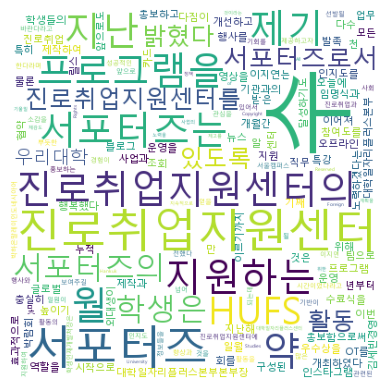

In [23]:
plt.figure()
plt.imshow(word)
plt.axis('off')

### 2. ÌîåÎ†àÏù¥Ïä§ÌÜ†Ïñ¥ Î¶¨Î∑∞ Îç∞Ïù¥ÌÑ∞ ÌÅ¨Î°§ÎßÅ(ÎèôÏ†Å ÌÅ¨Î°§ÎßÅ)

2.1 100Í∞ú Ïù¥ÏÉÅÏùò Î¶¨Î∑∞Î•º Í∞ÄÏßÑ Ïï±Ïóê ÏûàÎäî ÎåìÍ∏Ä Î¶¨Î∑∞Î•º ÌÅ¨Î°§ÎßÅÌïòÏãúÏò§.

In [2]:
pip install google_play_scraper

Note: you may need to restart the kernel to use updated packages.


DEPRECATION: mecab-python 0.996-ko-0.9.2-msvc has a non-standard version number. pip 23.3 will enforce this behaviour change. A possible replacement is to upgrade to a newer version of mecab-python or contact the author to suggest that they release a version with a conforming version number. Discussion can be found at https://github.com/pypa/pip/issues/12063


In [3]:
from google_play_scraper import app

text = app(
    'com.nhn.android.nmap',
    lang='ko',
    country='kr'
)

In [4]:
from google_play_scraper import Sort, reviews_all

result = reviews_all(
    'com.nhn.android.nmap',
    sleep_milliseconds=0, 
    lang='ko', 
    country='kr', 
)


print(result)

[{'reviewId': '744a9514-e743-4eba-b0d9-bbb8d7561c92', 'userName': 'Minho Chang', 'userImage': 'https://play-lh.googleusercontent.com/a/ACg8ocLC3l6GwBDRssep2-k_13rK2KfA_pylKwc7Is6e0qbD=mo', 'content': 'ÏúÑÏÑ±ÏßÄÎèÑÎèÑ ÎØ∏Î¶¨Îã§Ïö¥Î∞õÏïÑ ÏÇ¨Ïö©Ìï†Ïàò ÏûàÍ≤å Ìï¥Ï£ºÏÑ∏Ïöî', 'score': 3, 'thumbsUpCount': 0, 'reviewCreatedVersion': '5.25.13.1', 'at': datetime.datetime(2024, 3, 17, 21, 10, 1), 'replyContent': 'ÏïàÎÖïÌïòÏÑ∏Ïöî. ÎÑ§Ïù¥Î≤Ñ ÏßÄÎèÑ ÏÑúÎπÑÏä§ÏûÖÎãàÎã§.\nÏÑúÎπÑÏä§Ïóê ÎåÄÌïú ÏÜåÏ§ëÌïú ÏùòÍ≤¨ Í∞êÏÇ¨ÎìúÎ¶ΩÎãàÎã§.\nÍ≥†Í∞ùÎãòÍªòÏÑú Î≥¥ÎÇ¥Ï£ºÏã† ÏùòÍ≤¨ÏùÄ Ï∂îÌõÑ ÏÑúÎπÑÏä§ Í∞úÏÑ† Ïãú Ï∞∏Í≥†ÌïòÎèÑÎ°ù ÌïòÍ≤†ÏäµÎãàÎã§.\nÎã§Îßå, ÏÑúÎπÑÏä§Ïóê Ïã§Ï†ú Ï†ÅÏö©ÍπåÏßÄÎäî ÏãúÍ∞ÑÏù¥ ÌïÑÏöîÌïú Ï†ê ÏñëÌï¥ Î∂ÄÌÉÅÎìúÎ¶ΩÎãàÎã§.\nÎÑ§Ïù¥Î≤Ñ ÏßÄÎèÑ ÏÑúÎπÑÏä§Î•º Ïù¥Ïö©Ìï¥Ï£ºÏÖîÏÑú Í∞êÏÇ¨ÎìúÎ¶¨Î©∞, Îçî ÎÇòÏùÄ ÏÑúÎπÑÏä§Î•º Ï†úÍ≥µÌïòÎèÑÎ°ù ÎÖ∏Î†•ÌïòÍ≤†ÏäµÎãàÎã§.', 'repliedAt': datetime.datetime(2024, 3, 18, 15, 24, 44), 'appVersion': '5.25.13.1'}, {'reviewId': '6492d15f-157f-48ff-a413-952a9c6afbc2', 'userName': 'Ïú

2.2 ÌÅ¨Î°§ÎßÅÌïú Îç∞Ïù¥ÌÑ∞Î•º dataframe ÌòïÌÉúÎ°ú Î≥ÄÌôòÌïòÏãúÏò§(ÎÇ†Ïßú, Î≥ÑÏ†ê, Î¶¨Î∑∞ Ïú†Ï†Ä Îì±).

In [5]:
df = pd.DataFrame(result)
df1 = df[['at', 'content', 'score']]
print(df1)

df1.head(10)

                     at                                            content  \
0   2024-03-17 21:10:01                          ÏúÑÏÑ±ÏßÄÎèÑÎèÑ ÎØ∏Î¶¨Îã§Ïö¥Î∞õÏïÑ ÏÇ¨Ïö©Ìï†Ïàò ÏûàÍ≤å Ìï¥Ï£ºÏÑ∏Ïöî   
1   2024-03-17 16:43:47                        Í≤ÄÏÉâÏùÑ Ìï¥ÏÑú Í∞ÄÎäîÎç∞ Í±¥Î¨ºÏùÑ Í∞ÄÎ°úÏßàÎü¨ Í∞ÄÎùºÎÑ§Ïöî...   
2   2024-03-17 15:04:31  ÎÑ§Ïù¥Î≤Ñ ÏßÄÎèÑ Ïï±ÏùÑ Ìï≠ÏÉÅ Ïûò Ïù¥Ïö©ÌïòÎäî Ïú†Ï†ÄÏûÖÎãàÎã§~. ÌäπÌûà Ï†ÄÍ∞ôÏùÄ Í≤ΩÏö∞Îäî Ïñ¥Îñ†Ìïú Î™©Ï†ÅÏßÄ...   
3   2024-03-17 14:33:17  Î≠êÎãà??? ÎÑàÎ¨¥~~~ ÎÑàÎ¨¥ Î∂àÌé∏ÌïòÍ≥†~~~ Îòê Î∂àÌé∏ÌïòÍ≥†@@@ ÎÑàÎ¨¥ Î∂àÌé∏Ìï¥ÏÑú Î™ªÏì∞Í≤†ÎÑ§ ...   
4   2024-03-17 12:23:47  Ï¢ãÏùÄ Ïû•ÏÜå Ï∞æÍ∏∞ ÎÑàÎ¨¥ Ï¢ãÍ≥† Ìé∏Î¶¨Ìï¥ÏÑú Îäò Ïï†Ïö©Ìï¥Ïöî Í∑∏Îü∞Îç∞ ÏöîÏ¶òÎì§Ïñ¥ Ï†ÄÏû•Ìï¥ÎÜìÏùÄ ÏúÑÏπò Î≥Ñ...   
..                  ...                                                ...   
791 2023-11-23 14:41:45  ÎßàÏù¥ ÌîåÎ†àÏù¥Ïä§ ÏÑ§Ï†ïÌïòÎäîÍ±∞ ÎÑàÎ¨¥ ÏûòÏì∞Í≥† ÏûàÎäîÎç∞ Î≥ÑÌëú ÏÉâÏÉÅ Ï∂îÍ∞Ä Ìï¥Ï£ºÏãúÎ©¥ Ï†ïÎßê Îçî Ïûò ...   
792 2023-11-23 13:08:30  Í∏∏ Ï∞æÏïÑÍ∞ÄÎäîÎç∞ Ï

at                                            content  \
0 2024-03-17 21:10:01                          ÏúÑÏÑ±ÏßÄÎèÑÎèÑ ÎØ∏Î¶¨Îã§Ïö¥Î∞õÏïÑ ÏÇ¨Ïö©Ìï†Ïàò ÏûàÍ≤å Ìï¥Ï£ºÏÑ∏Ïöî   
1 2024-03-17 16:43:47                        Í≤ÄÏÉâÏùÑ Ìï¥ÏÑú Í∞ÄÎäîÎç∞ Í±¥Î¨ºÏùÑ Í∞ÄÎ°úÏßàÎü¨ Í∞ÄÎùºÎÑ§Ïöî...   
2 2024-03-17 15:04:31  ÎÑ§Ïù¥Î≤Ñ ÏßÄÎèÑ Ïï±ÏùÑ Ìï≠ÏÉÅ Ïûò Ïù¥Ïö©ÌïòÎäî Ïú†Ï†ÄÏûÖÎãàÎã§~. ÌäπÌûà Ï†ÄÍ∞ôÏùÄ Í≤ΩÏö∞Îäî Ïñ¥Îñ†Ìïú Î™©Ï†ÅÏßÄ...   
3 2024-03-17 14:33:17  Î≠êÎãà??? ÎÑàÎ¨¥~~~ ÎÑàÎ¨¥ Î∂àÌé∏ÌïòÍ≥†~~~ Îòê Î∂àÌé∏ÌïòÍ≥†@@@ ÎÑàÎ¨¥ Î∂àÌé∏Ìï¥ÏÑú Î™ªÏì∞Í≤†ÎÑ§ ...   
4 2024-03-17 12:23:47  Ï¢ãÏùÄ Ïû•ÏÜå Ï∞æÍ∏∞ ÎÑàÎ¨¥ Ï¢ãÍ≥† Ìé∏Î¶¨Ìï¥ÏÑú Îäò Ïï†Ïö©Ìï¥Ïöî Í∑∏Îü∞Îç∞ ÏöîÏ¶òÎì§Ïñ¥ Ï†ÄÏû•Ìï¥ÎÜìÏùÄ ÏúÑÏπò Î≥Ñ...   
5 2024-03-17 10:59:04                                          Í∞ëÏûêÍ∏∞Ïù¥ÏÉÅÌï¥Ï°åÏñ¥Ïöî   
6 2024-03-16 15:00:25                          Î≤ÑÏä§Í∞Ä ÎèÑÏ∞©ÌïòÏßÄ ÏïäÎäî Ï†ïÎ•òÏû•ÏúºÎ°ú Í∞ÄÎùºÍ≥† ÌïòÎÑ§Ïöî   
7 2024-03-16 12:19:23  ÏµúÏ†ÅÏùò Í≤ΩÎ°úÍ∞Ä ÏûàÎäîÎç∞ Í∑∏Í±∞Îäî Î™®Î•¥Í≥† ÏµúÏû•ÏùòÍ∏∏Ïù¥Î°ú ÌÉêÏÉâÌï® Í∞ú Î∑∞ÏõÖÏã†Í∞ôÏùå ÏñòÎïåÎ¨∏Ïóê Í∏∏ ...   
8 2024-03-16 10:03:35                                   ÏïàÎìúÎ°úÏù¥Îìú Ïò§ÌÜ† Í∞ëÏûêÍ∏∞ ÏïàÎê®.   
9 2024-03-16 08:22:21  ÏïàÎìúÎ°úÏù¥Îìú Ïò§ÌÜ†Îßå Í∑∏Îü∞ÏßÄ Î™®Î•¥Í≤üÏäµÎãàÎã§. Íµ¨Í∞ÑÎã®ÏÜç ÏïàÎÇ¥Í∞Ä ÎêòÏßÄ ÏïäÏäµÎãàÎã§. Îã®ÏÜçÏïàÎÇ¥Îäî ...   

   score  
0      3  
1      1  
2      5  
3      1  
4      5  
5      1  
6      1  
7      1  
8      2  
9      3

2.3 Í∏çÏ†ï Î¶¨Î∑∞ÏôÄ Î∂ÄÏ†ï Î¶¨Î∑∞Î•º ÎÇòÎàÑÏãúÏò§(Í∏∞Ï§ÄÏùÄ ÏûêÏú†).

In [6]:
positive = df1[df1['score']==5]
negative = df1[df1['score']==1]

In [7]:
positive

at                                            content  \
2   2024-03-17 15:04:31  ÎÑ§Ïù¥Î≤Ñ ÏßÄÎèÑ Ïï±ÏùÑ Ìï≠ÏÉÅ Ïûò Ïù¥Ïö©ÌïòÎäî Ïú†Ï†ÄÏûÖÎãàÎã§~. ÌäπÌûà Ï†ÄÍ∞ôÏùÄ Í≤ΩÏö∞Îäî Ïñ¥Îñ†Ìïú Î™©Ï†ÅÏßÄ...   
4   2024-03-17 12:23:47  Ï¢ãÏùÄ Ïû•ÏÜå Ï∞æÍ∏∞ ÎÑàÎ¨¥ Ï¢ãÍ≥† Ìé∏Î¶¨Ìï¥ÏÑú Îäò Ïï†Ïö©Ìï¥Ïöî Í∑∏Îü∞Îç∞ ÏöîÏ¶òÎì§Ïñ¥ Ï†ÄÏû•Ìï¥ÎÜìÏùÄ ÏúÑÏπò Î≥Ñ...   
11  2024-03-15 22:12:01                                             Ï¢ãÏïÑÏöî. ~   
14  2024-03-15 17:00:10                                                 ÏÑúÏö∏   
15  2024-03-15 16:30:38                           ÍπúÏßùÎÜÄÎû¨Ïñ¥Ïöî Ìé∏Î¶¨Ìïú Í≤ÉÎì§ÏùÑ Ï∞æÏïÑÎÇ¥ÏÑú Ïû¨Î∞åÎÑ§Ïöî   
..                  ...                                                ...   
783 2023-11-24 05:47:54                                                Ï¢ãÏïÑÏöî   
784 2023-11-24 01:53:50                       Ìé∏Î¶¨ÌïòÍ≥† ÏûêÏÑ∏Ìïú Ï†ïÎ≥¥ÎèÑ ÏïåÎ†§Ï£ºÎ©∞ ÎÑ§ÎπÑÍ∏∞Îä•ÎèÑ ÏûàÏñ¥Ïöî!   
788 2023-11-23 18:45:33                                               Ìé∏Ìï¥Ïöî!   
791 2023-11-23 14:41:45  ÎßàÏù¥ ÌîåÎ†àÏù¥Ïä§ ÏÑ§Ï†ïÌïòÎäîÍ±∞ ÎÑàÎ¨¥ ÏûòÏì∞Í≥† ÏûàÎäîÎç∞ Î≥ÑÌëú ÏÉâÏÉÅ Ï∂îÍ∞Ä Ìï¥Ï£ºÏãúÎ©¥ Ï†ïÎßê Îçî Ïûò ...   
792 2023-11-23 13:08:30  Í∏∏ Ï∞æÏïÑÍ∞ÄÎäîÎç∞ Ïûò ÏÇ¨Ïö©ÌïòÍ≥† ÏûàÏäµÎãàÎã§. ÏÑ∏Ï¢ÖÏãú ÎßàÏùÑÎ≤ÑÏä§ 52Î≤àÏùò Í≤ΩÎ°úÍ∞Ä Ïã§Ï†úÏôÄ Îã§Î•∏ ...   

     score  
2        5  
4        5  
11       5  
14       5  
15       5  
..     ...  
783      5  
784      5  
788      5  
791      5  
792      5  

[237 rows x 3 columns]

In [8]:
negative

at                                            content  \
1   2024-03-17 16:43:47                        Í≤ÄÏÉâÏùÑ Ìï¥ÏÑú Í∞ÄÎäîÎç∞ Í±¥Î¨ºÏùÑ Í∞ÄÎ°úÏßàÎü¨ Í∞ÄÎùºÎÑ§Ïöî...   
3   2024-03-17 14:33:17  Î≠êÎãà??? ÎÑàÎ¨¥~~~ ÎÑàÎ¨¥ Î∂àÌé∏ÌïòÍ≥†~~~ Îòê Î∂àÌé∏ÌïòÍ≥†@@@ ÎÑàÎ¨¥ Î∂àÌé∏Ìï¥ÏÑú Î™ªÏì∞Í≤†ÎÑ§ ...   
5   2024-03-17 10:59:04                                          Í∞ëÏûêÍ∏∞Ïù¥ÏÉÅÌï¥Ï°åÏñ¥Ïöî   
6   2024-03-16 15:00:25                          Î≤ÑÏä§Í∞Ä ÎèÑÏ∞©ÌïòÏßÄ ÏïäÎäî Ï†ïÎ•òÏû•ÏúºÎ°ú Í∞ÄÎùºÍ≥† ÌïòÎÑ§Ïöî   
7   2024-03-16 12:19:23  ÏµúÏ†ÅÏùò Í≤ΩÎ°úÍ∞Ä ÏûàÎäîÎç∞ Í∑∏Í±∞Îäî Î™®Î•¥Í≥† ÏµúÏû•ÏùòÍ∏∏Ïù¥Î°ú ÌÉêÏÉâÌï® Í∞ú Î∑∞ÏõÖÏã†Í∞ôÏùå ÏñòÎïåÎ¨∏Ïóê Í∏∏ ...   
..                  ...                                                ...   
779 2023-11-24 15:13:06  ÌïúÎ≤àÏî© Í∏∏ Ïù¥ÏÉÅÌïòÍ≤å ÏïåÎ†§Ï§òÏÑú Ïïà ÌÉÄÎèÑ Îê† Í≥†ÏÜçÎèÑÎ°ú ÌÉúÏõåÏÑú Îèà ÎÇ¥Í≤å ÌïòÍ≥† ÏôîÎçò Í∏∏Î°ú ...   
780 2023-11-24 11:35:15                  Ïã§ÏãúÍ∞Ñ ÍµêÌÜµÏ†ïÎ≥¥ Î∞òÏòÅÌïòÍ≥† ÏïåÎ†§Ï£ºÎäîÍ±∞ÎÉê? ÎòëÎ∞îÎ°ú Í∞úÎ∞úÌï¥Îùº ÏßÑÏßú   
785 2023-11-24 00:22:10  ÏúÑÏπòÏÑ§Ï†ï Í∂åÌïú ÏÑ§Ï†ïÌï¥ÏÑú Î∞õÏïÑÍ∞îÏúºÎ©¥ Í∑∏ Í∞íÏñ¥ÏπòÏ¢Ä Ìï¥ÎÉÖÏãúÎã§ ÎäêÍ∑∏Îì§ Ïù¥ÏùµÎßå Ï≤ò Í∞ÄÏ†∏Í∞àÎùºÌïò...   
793 2023-11-23 10:08:58  ÎÑ§ÎπÑÍ≤åÏù¥ÏÖòÏùÄ Ïù¥Í±∞Î°ú Ïì∏Í≤å Î™ªÎêòÎÑ§Ïöî.. „Öé„Öé„Öé„Öé ÏôÑÏ†Ñ ÎßâÌûàÎäî Í∏∏Ïù∏Îç∞, Ï†úÏùº Îπ†Î•¥Îã§Í≥†Ìï¥...   
794 2023-11-23 00:27:11  Ïù¥Îü∞ Í∑∏ÏßÄÍ∞ôÏùÄ ÏßÄÎèÑ ÏûàÏùÑÍπå. ÎÇ¥Í∞Ä Ïò§ÎîîÍ∞ÄÍ≥† Ïù¥ÎäîÏßÄ ÌôïÏù∏ÎêòÏßÄ ÏïäÎäî ÏßÄÎèÑÍ∞Ä ÏûàÏùÑÍπå? Ïù¥...   

     score  
1        1  
3        1  
5        1  
6        1  
7        1  
..     ...  
779      1  
780      1  
785      1  
793      1  
794      1  

[235 rows x 3 columns]

### 3. ÏûêÏú† Î∂ÑÏÑù

3.1 ÏúÑÏóêÏÑú ÌÅ¨Î°§ÎßÅÌïú Îç∞Ïù¥ÌÑ∞Îì§ÏùÑ ÌôúÏö©Ìï¥ ÏûêÏú†Î°≠Í≤å Ïù∏ÏÇ¨Ïù¥Ìä∏Î•º ÎèÑÏ∂úÌïòÏãúÏò§.

In [11]:
import matplotlib.pyplot as plt
df1['at'] = pd.to_datetime(df1['at'])

C:\Users\eun01\AppData\Local\Temp\ipykernel_15304\698340217.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['at'] = pd.to_datetime(df1['at'])


C:\Users\eun01\AppData\Local\Temp\ipykernel_15304\2584952125.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['month'] = df2['at'].dt.to_period('M')


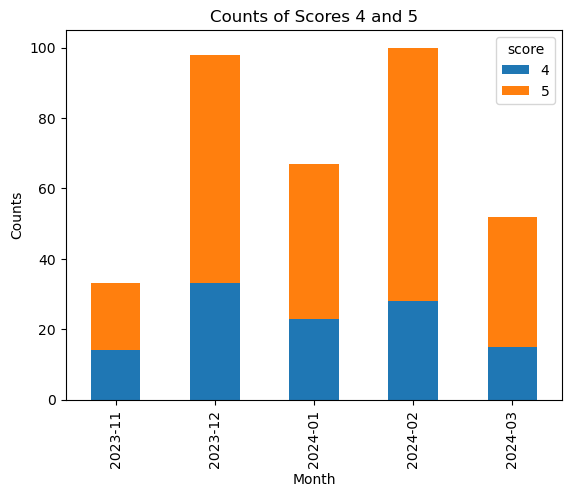

In [22]:
df2 = df1[df1['score'].isin([4, 5])]

df2['month'] = df2['at'].dt.to_period('M')
score_high = df2.groupby(['month', 'score']).size().unstack(fill_value=0)

score_high.plot(kind='bar', stacked=True)
plt.xlabel('Month')
plt.ylabel('Counts')
plt.title('Counts of Scores 4 and 5')
plt.show()

C:\Users\eun01\AppData\Local\Temp\ipykernel_15304\1413853364.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3['month'] = df3['at'].dt.to_period('M')


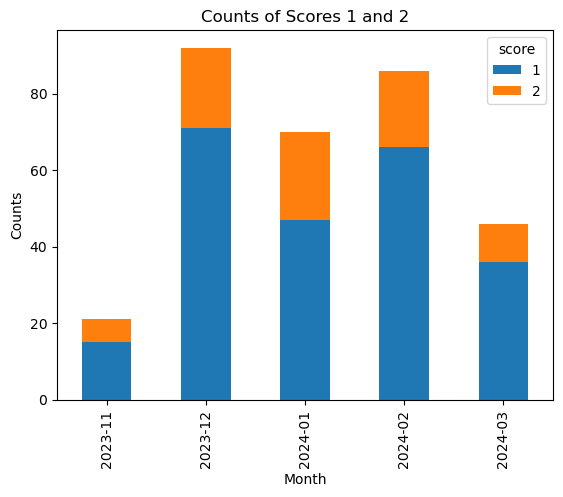

In [23]:
df3 = df1[df1['score'].isin([1, 2])]

df3['month'] = df3['at'].dt.to_period('M')
score_low = df3.groupby(['month', 'score']).size().unstack(fill_value=0)

score_low.plot(kind='bar', stacked=True)
plt.xlabel('Month')
plt.ylabel('Counts')
plt.title('Counts of Scores 1 and 2')
plt.show()

In [16]:
score_counts = df1['score'].value_counts().sort_index()
print(score_counts)

1    235
2     80
3    131
4    113
5    237
Name: score, dtype: int64
